In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNetCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
data = pd.read_table('GSE10950_series_matrix.txt')

C:\Users\Debma\AppData\Local\Temp\ipykernel_6572\2806565247.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table('GSE10950_series_matrix.txt')


In [3]:
data = data.set_index('Sample').T

In [5]:
data

Sample,Sample Description,ILMN_1343291,ILMN_1343292,ILMN_1343293,ILMN_1343294,ILMN_1651209,ILMN_1651217,ILMN_1651228,ILMN_1651229,ILMN_1651234,...,ILMN_1815923,ILMN_1815924,ILMN_1815933,ILMN_1815937,ILMN_1815938,ILMN_1815941,ILMN_1815951,ILMN_2038774,ILMN_2038777,ILMN_2038778
N1,Normal,56190.14,1971.443,16093.71,54993.97,40.00085,5.684647,31040.54,223.2116,-2.187667,...,21.15968,419.1906,173.02,111.4956,8.302612,624.8198,200.0302,39215.89,28558.14,11303.5
T1,Primay tumor,52176.93,606.7773,18485.05,46674.46,35.96349,18.28151,30282.59,221.1387,0.3357176,...,13.90939,1017.365,293.4511,51.37997,-7.676422,89.04105,297.8348,48556.75,26478.78,21009.94
N2,Normal,50483.09,8916.936,10451.59,48284.97,31.27827,13.90439,26012.85,431.4342,-10.48382,...,9.122181,619.0782,139.2744,47.95465,4.253619,331.57,160.6262,42814.16,42527.69,14241.25
T2,Primay tumor,38690.04,3148.337,23610.13,36091.75,18.39922,1.182301,25750.38,178.7281,5.197227,...,-3.768425,1847.47,354.8188,67.30951,-4.145857,222.8831,215.5376,37049.47,33330.46,32106.39
N3,Normal,54803.84,3906.875,11740.43,62380.23,59.5614,18.28643,28069.13,376.0385,6.185607,...,30.74828,462.7539,180.9093,372.5614,-9.525824,307.9792,167.734,38649.68,36737.0,11845.22
T3,Primay tumor,52006.33,1553.541,20074.07,56790.41,38.47763,3.046845,37906.21,313.6529,4.660929,...,4.33756,1538.207,327.6797,160.8887,3.173003,390.2606,169.4709,19928.72,35074.84,31232.45
N4,Normal,45847.25,6240.805,9185.637,44195.88,19.27786,44.41323,26729.13,494.9206,0.2952677,...,-4.681081,569.0219,163.229,17.71757,-1.507952,392.256,230.4232,39478.76,40078.56,13788.28
T4,Primay tumor,66288.21,883.6413,24564.12,82740.92,37.25268,11.14272,36211.12,186.498,3.812703,...,9.046455,871.6389,253.3224,187.331,8.515198,379.5339,183.5179,40934.46,27459.34,23013.48
N5,Normal,48275.86,11706.21,6891.894,50603.63,50.21552,-3.433882,23780.8,719.8223,-8.053953,...,22.373,629.3758,198.7061,17.82549,-7.033357,347.5759,197.3016,38290.77,49031.66,16026.82
T5,Primay tumor,44676.39,1229.109,20303.1,42153.91,37.5521,8.733508,29171.1,239.5794,-7.967557,...,6.796918,540.3752,242.8107,93.37427,0.251794,179.0247,326.8972,38734.47,35752.12,26704.86


In [ ]:
data =data.set_index('ID_REF').rename_axis('Sample').T

In [31]:
data['Type'] = np.repeat(['Control', 'DLBCL'], [14, 17])

In [6]:
le = LabelEncoder()

In [116]:
data['ILMN_1343291'] = le.fit_transform(data['ILMN_1343291'])

In [7]:
data.sort_index(inplace=True)

In [8]:
data

Sample,Sample Description,ILMN_1343291,ILMN_1343292,ILMN_1343293,ILMN_1343294,ILMN_1651209,ILMN_1651217,ILMN_1651228,ILMN_1651229,ILMN_1651234,...,ILMN_1815923,ILMN_1815924,ILMN_1815933,ILMN_1815937,ILMN_1815938,ILMN_1815941,ILMN_1815951,ILMN_2038774,ILMN_2038777,ILMN_2038778
N1,Normal,56190.14,1971.443,16093.71,54993.97,40.00085,5.684647,31040.54,223.2116,-2.187667,...,21.15968,419.1906,173.02,111.4956,8.302612,624.8198,200.0302,39215.89,28558.14,11303.5
N11,Normal,45410.86,4746.712,14165.95,45377.87,27.54239,5.255875,27948.65,456.8367,-15.5301,...,16.92056,541.3101,127.4457,85.02119,4.997784,456.2903,148.4398,37420.5,41659.26,12904.76
N12,Normal,46885.68,7162.732,6416.388,47147.68,24.51054,3.016398,24697.5,772.4355,-20.33775,...,18.42618,547.4104,150.0935,16.89493,1.561268,270.0022,177.0684,40799.23,45476.28,14540.63
N13,Normal,48130.11,7395.394,11614.78,62031.43,7.094526,15.22472,26662.93,455.7402,-8.26789,...,12.9915,559.5427,111.5869,93.66109,-7.635701,295.6549,114.5995,37141.5,45567.58,14453.63
N14,Normal,48288.96,3106.258,15436.79,60853.59,31.46357,11.28834,32068.77,332.6186,-2.936152,...,15.64466,387.0423,150.3034,101.7278,-4.529421,689.4151,118.959,36745.5,38084.84,13527.21
N15,Normal,46001.88,6425.696,10778.24,46895.63,22.88033,24.16375,28541.34,449.0192,-2.300065,...,1.053387,741.4368,181.451,51.93966,7.350909,268.2217,145.1671,36591.8,30942.16,14224.08
N16,Normal,49461.55,3780.711,12101.02,58296.99,19.19434,6.504419,26667.36,313.8556,-15.18333,...,28.29583,512.6735,102.7786,188.6785,-2.750165,581.7073,108.535,42445.1,35817.55,11368.47
N17,Normal,41055.52,2198.776,19152.26,55045.75,20.89559,11.31906,29002.37,293.0896,-9.933331,...,7.75414,459.0513,158.4431,145.3568,6.125565,795.8966,98.30709,24439.38,32975.36,11376.85
N18,Normal,45971.43,7346.743,9404.983,46676.09,34.2937,7.770569,26713.27,574.8986,-15.55967,...,10.79637,595.8144,124.5429,49.82771,0.568539,387.6549,151.7468,39633.03,45536.98,14092.56
N19,Normal,45550.09,8687.202,7461.153,47603,38.98597,6.396045,21856.6,571.2099,-9.955986,...,3.843193,696.3514,112.5224,22.33757,16.83341,424.7673,209.5815,43917.75,42141.44,14732.0


<h1>Differential Gene Expression Analysis</h1>

In [9]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [109]:
print(data.drop('Sample Description', axis=1).dtypes)

Sample
ILMN_1343291    object
ILMN_1343292    object
ILMN_1343293    object
ILMN_1343294    object
ILMN_1651209    object
                 ...  
ILMN_1815941    object
ILMN_1815951    object
ILMN_2038774    object
ILMN_2038777    object
ILMN_2038778    object
Length: 22184, dtype: object


In [17]:
diff_data.loc[:, (diff_data >= 0).all()]

Sample,ILMN_1343291,ILMN_1343292,ILMN_1343293,ILMN_1343294,ILMN_1651209,ILMN_1651228,ILMN_1651229,ILMN_1651254,ILMN_1651259,ILMN_1651261,...,ILMN_1815885,ILMN_1815908,ILMN_1815924,ILMN_1815933,ILMN_1815937,ILMN_1815941,ILMN_1815951,ILMN_2038774,ILMN_2038777,ILMN_2038778
N1,56190,1971,16093,54993,40,31040,223,8473,61,224,...,159,34,419,173,111,624,200,39215,28558,11303
N11,45410,4746,14165,45377,27,27948,456,25470,26,128,...,159,26,541,127,85,456,148,37420,41659,12904
N12,46885,7162,6416,47147,24,24697,772,36082,15,216,...,255,35,547,150,16,270,177,40799,45476,14540
N13,48130,7395,11614,62031,7,26662,455,24971,34,149,...,148,31,559,111,93,295,114,37141,45567,14453
N14,48288,3106,15436,60853,31,32068,332,15497,31,230,...,136,25,387,150,101,689,118,36745,38084,13527
N15,46001,6425,10778,46895,22,28541,449,7353,15,196,...,127,22,741,181,51,268,145,36591,30942,14224
N16,49461,3780,12101,58296,19,26667,313,16514,52,220,...,169,12,512,102,188,581,108,42445,35817,11368
N17,41055,2198,19152,55045,20,29002,293,9499,33,118,...,178,25,459,158,145,795,98,24439,32975,11376
N18,45971,7346,9404,46676,34,26713,574,31684,34,201,...,210,33,595,124,49,387,151,39633,45536,14092
N19,45550,8687,7461,47603,38,21856,571,39543,32,278,...,194,36,696,112,22,424,209,43917,42141,14732


In [93]:
mod_df = data[expression_data_selected.columns]
metadata = pd.DataFrame(zip(mod_df.index, np.repeat(['N', 'T'], [28, 28])), columns=['Sample', 'Type'])
metadata.set_index('Sample', inplace=True)
diff_data = mod_df
diff_data = diff_data.astype('float')
diff_data = diff_data.astype('int64')
diff_data = diff_data.loc[:, (diff_data >=0).all()]
dds = DeseqDataSet(counts=diff_data, metadata=metadata, design_factors='Type')
dds.deseq2()
stat_res = DeseqStats(dds, contrast=('Type', 'N', 'T'))
stat_res.summary()
res = stat_res.results_df
res

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 0.15 seconds.

Fitting dispersion trend curve...
C:\Users\Debma\AppData\Roaming\Python\Python312\site-packages\pydeseq2\dds.py:590: UserWarning: The dispersion trend curve fitting did not converge. Switching to a mean-based dispersion trend.
  self._fit_parametric_dispersion_trend()
... done in 0.06 seconds.

Fitting MAP dispersions...
... done in 0.16 seconds.

Fitting LFCs...
... done in 0.14 seconds.

Replacing 1 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...
... done in 0.14 seconds.



Log2 fold change & Wald test p-value: Type N vs T
                  baseMean  log2FoldChange     lfcSE      stat        pvalue  \
Sample                                                                         
ILMN_1689329   6224.098649       -1.860385  0.295663 -6.292249  3.128998e-10   
ILMN_1801216   5031.403533       -1.849656  0.453375 -4.079752  4.508377e-05   
ILMN_1694778  12887.145991       -1.356426  0.357806 -3.790950  1.500724e-04   
ILMN_1715401   9079.593901        1.995606  0.395486  5.045960  4.512506e-07   
ILMN_1781285   8711.253869        1.749924  0.284060  6.160395  7.256394e-10   
...                    ...             ...       ...       ...           ...   
ILMN_1702361     14.510070        0.159534  0.212379  0.751177  4.525463e-01   
ILMN_1702320     29.410472        0.636307  0.203790  3.122364  1.794051e-03   
ILMN_1702413     87.365778        0.142352  0.140144  1.015759  3.097441e-01   
ILMN_1702301    246.447386        1.000200  0.206692  4.839089  1.3043

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Sample,,,,,,
ILMN_1689329,6224.098649,-1.860385,0.295663,-6.292249,3.128998e-10,1.955624e-09
ILMN_1801216,5031.403533,-1.849656,0.453375,-4.079752,4.508377e-05,1.048460e-04
ILMN_1694778,12887.145991,-1.356426,0.357806,-3.790950,1.500724e-04,3.126509e-04
ILMN_1715401,9079.593901,1.995606,0.395486,5.045960,4.512506e-07,1.671299e-06
ILMN_1781285,8711.253869,1.749924,0.284060,6.160395,7.256394e-10,3.819155e-09
...,...,...,...,...,...,...
ILMN_1702361,14.510070,0.159534,0.212379,0.751177,4.525463e-01,5.518857e-01
ILMN_1702320,29.410472,0.636307,0.203790,3.122364,1.794051e-03,3.337077e-03
ILMN_1702413,87.365778,0.142352,0.140144,1.015759,3.097441e-01,4.129922e-01


In [94]:
res.rename_axis('Gene', inplace=True)

In [95]:
res['symbol'] = res.index

In [96]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ILMN_1689329,6224.098649,-1.860385,0.295663,-6.292249,3.128998e-10,1.955624e-09,ILMN_1689329
ILMN_1801216,5031.403533,-1.849656,0.453375,-4.079752,4.508377e-05,1.048460e-04,ILMN_1801216
ILMN_1694778,12887.145991,-1.356426,0.357806,-3.790950,1.500724e-04,3.126509e-04,ILMN_1694778
ILMN_1715401,9079.593901,1.995606,0.395486,5.045960,4.512506e-07,1.671299e-06,ILMN_1715401
ILMN_1781285,8711.253869,1.749924,0.284060,6.160395,7.256394e-10,3.819155e-09,ILMN_1781285
...,...,...,...,...,...,...,...
ILMN_1702361,14.510070,0.159534,0.212379,0.751177,4.525463e-01,5.518857e-01,ILMN_1702361
ILMN_1702320,29.410472,0.636307,0.203790,3.122364,1.794051e-03,3.337077e-03,ILMN_1702320
ILMN_1702413,87.365778,0.142352,0.140144,1.015759,3.097441e-01,4.129922e-01,ILMN_1702413


In [22]:
res[res['pvalue']<0.05]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Gene,,,,,,,
ILMN_1343292,3326.832464,2.056518,0.248736,8.267860,1.363846e-16,5.114613e-15,ILMN_1343292
ILMN_1343293,15463.106125,-0.714337,0.143976,-4.961503,6.994987e-07,3.711807e-06,ILMN_1343293
ILMN_1343294,47226.050169,0.332007,0.094625,3.508678,4.503402e-04,1.319290e-03,ILMN_1343294
ILMN_1651229,392.299961,0.594130,0.147426,4.030029,5.576993e-05,1.963829e-04,ILMN_1651229
ILMN_1651254,15154.393923,1.715507,0.194547,8.817952,1.165720e-18,6.120258e-17,ILMN_1651254
...,...,...,...,...,...,...,...
ILMN_1815933,217.601840,-0.860767,0.136162,-6.321651,2.587830e-10,2.880915e-09,ILMN_1815933
ILMN_1815941,353.931263,0.600348,0.186056,3.226710,1.252221e-03,3.313844e-03,ILMN_1815941
ILMN_1815951,168.999760,-0.359315,0.177983,-2.018821,4.350586e-02,7.737201e-02,ILMN_1815951


In [23]:
from sanbomics.plots import volcano

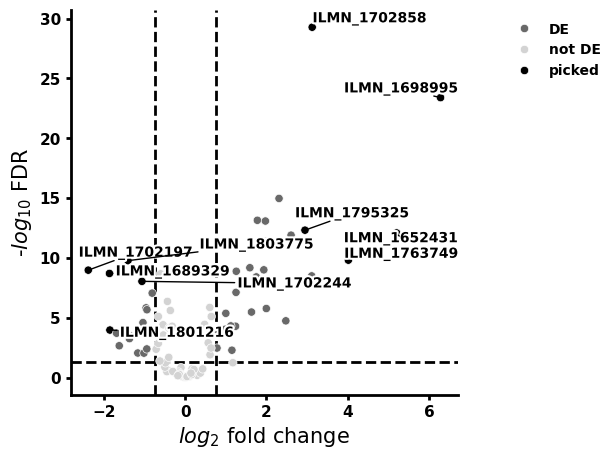

In [97]:
volcano(res, symbol="symbol")

In [26]:
diff_data['Type'] = data['Sample Description']

In [72]:
diff_data.head()

Sample,ILMN_1343291,ILMN_1343292,ILMN_1343293,ILMN_1343294,ILMN_1651209,ILMN_1651228,ILMN_1651229,ILMN_1651254,ILMN_1651259,ILMN_1651261,...,ILMN_1815908,ILMN_1815924,ILMN_1815933,ILMN_1815937,ILMN_1815941,ILMN_1815951,ILMN_2038774,ILMN_2038777,ILMN_2038778,Type
N1,56190,1971,16093,54993,40,31040,223,8473,61,224,...,34,419,173,111,624,200,39215,28558,11303,0
N11,45410,4746,14165,45377,27,27948,456,25470,26,128,...,26,541,127,85,456,148,37420,41659,12904,0
N12,46885,7162,6416,47147,24,24697,772,36082,15,216,...,35,547,150,16,270,177,40799,45476,14540,0
N13,48130,7395,11614,62031,7,26662,455,24971,34,149,...,31,559,111,93,295,114,37141,45567,14453,0
N14,48288,3106,15436,60853,31,32068,332,15497,31,230,...,25,387,150,101,689,118,36745,38084,13527,0


In [28]:
diff_data['Type'] = le.fit_transform(diff_data['Type'])

In [30]:
X = diff_data.drop('Type', axis=1)
y = diff_data['Type']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)
reg = linear_model.LassoCV(cv=20).fit(X, y)
coef = np.abs(reg.coef_)
important_genes = coef.argsort()[-100:][::-1]
expression_data_selected = diff_data.drop('Type', axis=1).iloc[:, important_genes]

In [92]:
expression_data_selected.columns

Index(['ILMN_1689329', 'ILMN_1801216', 'ILMN_1694778', 'ILMN_1715401',
       'ILMN_1781285', 'ILMN_1701832', 'ILMN_1763749', 'ILMN_1704250',
       'ILMN_1736500', 'ILMN_1739257', 'ILMN_1745961', 'ILMN_1698995',
       'ILMN_1712522', 'ILMN_1710159', 'ILMN_1666672', 'ILMN_1800261',
       'ILMN_1657234', 'ILMN_1815124', 'ILMN_1811387', 'ILMN_1692223',
       'ILMN_1702487', 'ILMN_1760087', 'ILMN_1673871', 'ILMN_2038774',
       'ILMN_1696245', 'ILMN_1769753', 'ILMN_1662776', 'ILMN_1711606',
       'ILMN_1810214', 'ILMN_1701613', 'ILMN_1671478', 'ILMN_1729801',
       'ILMN_1698511', 'ILMN_1716687', 'ILMN_1652431', 'ILMN_1685387',
       'ILMN_1742163', 'ILMN_1699829', 'ILMN_1709880', 'ILMN_1784717',
       'ILMN_1750324', 'ILMN_1694034', 'ILMN_1756992', 'ILMN_1795325',
       'ILMN_1803775', 'ILMN_1674243', 'ILMN_1702125', 'ILMN_1702821',
       'ILMN_1702729', 'ILMN_1702114', 'ILMN_1702812', 'ILMN_1702806',
       'ILMN_1702755', 'ILMN_1702763', 'ILMN_1702797', 'ILMN_1702824',
      

In [73]:
data[expression_data_selected.columns]

Sample,ILMN_2038778,ILMN_1703092,ILMN_1702806,ILMN_1702797,ILMN_1702787,ILMN_1702769,ILMN_1702764,ILMN_1702763,ILMN_1702759,ILMN_1702755,...,ILMN_1702322,ILMN_1702301,ILMN_1702197,ILMN_1702296,ILMN_1702284,ILMN_1702279,ILMN_1702273,ILMN_1702265,ILMN_1702247,ILMN_1702244
N1,11303.5,22.41423,619.3741,63.3887,354.1738,42.33391,46.24014,305.744,125.5435,14.09256,...,129.3191,766.8784,72.57587,17.52727,447.135,542.3124,3211.982,1517.783,5117.529,40.29086
N11,12904.76,39.62407,917.5595,31.3712,93.83009,11.74282,38.71962,349.4518,279.4608,10.6072,...,82.37185,308.1436,62.00222,70.22181,427.63,357.0493,2494.76,1460.62,3013.541,36.01567
N12,14540.63,19.74549,1660.511,8.236538,39.26361,26.10456,55.15351,716.0883,557.5905,30.93132,...,47.80472,74.30981,25.0215,236.4225,454.293,278.2395,2117,1899.264,2093.669,30.30014
N13,14453.63,17.36203,1114.829,33.09129,97.6462,14.01763,43.15202,577.0558,309.0648,19.17097,...,94.39411,344.0931,63.16659,226.2795,453.3785,283.2925,2576.367,1285.822,3143.398,48.86329
N14,13527.21,40.22822,836.1118,34.33,288.2623,19.73058,31.58729,314.4458,201.548,15.8384,...,71.59319,505.7115,135.2007,36.05273,408.6539,562.4351,2139.417,1364.083,3259.436,52.48792
N15,14224.08,79.45879,939.7271,11.824,344.9427,4.676925,51.64118,344.8305,831.3095,19.13814,...,57.38898,510.2477,153.1602,31.30819,209.9112,324.4865,3863.653,1034.52,1618.808,32.04378
N16,11368.47,29.10178,722.6673,24.79743,145.3104,14.75094,34.53046,355.9819,215.7902,12.24795,...,105.7827,529.1099,47.64638,133.7192,342.3424,439.1589,3689.426,1301.351,4263.49,43.6793
N17,11376.85,25.22863,473.1311,71.60464,156.9836,26.66813,40.77856,409.0734,143.4792,6.476728,...,206.2583,351.9935,102.9574,20.42082,339.6946,615.3657,2877.157,1599.79,4855.181,58.01274
N18,14092.56,12.1318,1266.12,35.31173,56.30149,7.350643,46.80236,574.457,524.2995,11.77399,...,60.37963,171.0813,29.20284,144.3005,267.147,364.2963,2210.183,1386.806,2928.625,42.5532
N19,14732.0,4.577003,2033.419,14.30277,56.7629,27.16992,66.56539,568.7554,520.3577,33.04664,...,45.42704,121.7464,27.22817,285.744,296.7982,297.8622,2454.392,1321.573,2114.692,35.92508


In [77]:
A = data[expression_data_selected.columns]
b = diff_data['Type']

In [78]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [79]:
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

In [112]:
model = Sequential()

model.add(Input(shape=(A_train.shape[1],)))
model.add(Dense(40, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='mean_squared_error')

In [113]:
b_train = b_train.astype(float)
model.fit(A_train, b_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/50


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.3219 - val_loss: 0.1922
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.2823 - val_loss: 0.1666
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.2458 - val_loss: 0.1446
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.2137 - val_loss: 0.1252
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.1854 - val_loss: 0.1078
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.1606 - val_loss: 0.0924
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.1390 - val_loss: 0.0794
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.1206 - val_loss: 0.0685
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.1042 - val_loss: 0.0591
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0894 - val_loss: 0.0509
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0763 - val_loss: 0.0441
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 0.0650 - val_loss: 0.0382
Epo

<Axes: >

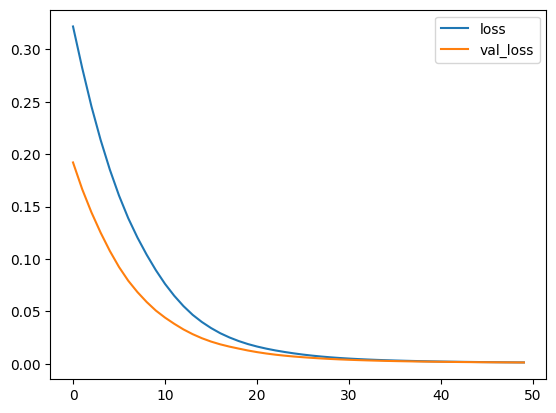

In [114]:
pd.DataFrame(model.history.history).plot()

In [101]:
model.predict(A_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


array([[0.9961156 ],
       [0.9942382 ],
       [0.99535096],
       [0.96335477],
       [0.99918157],
       [0.9873014 ],
       [0.02075328],
       [0.21871217],
       [0.0482819 ],
       [0.98598325]], dtype=float32)

In [102]:
b_test

T13    1
T26    1
T12    1
T3     1
T1     1
T22    1
N21    0
N3     0
N14    0
T11    1
Name: Type, dtype: int32